In [ ]:
import sys
from pathlib import Path
# Check one level up for imports (allows src modules)
sys.path.append(str(Path.cwd().parent))

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from src.preprocessing import clean_data
from src.models import get_models

In [11]:
# --- Load and preprocess training data
train = pd.read_csv("../data/raw/train.csv")


# X: pandas.DataFrame of feature matrix (Data minus 'Survived')
# y: pandas.Series of target data ('Survived')
X, y = clean_data(train, is_train=True)


# Check 
X.shape
y.shape


# --- Train / Validate split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# --- Train and evaluate models ---
models = get_models()

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    acc = accuracy_score(y_val, predictions)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.8045
Random Forest: 0.7989
Gradient Boosting: 0.7989


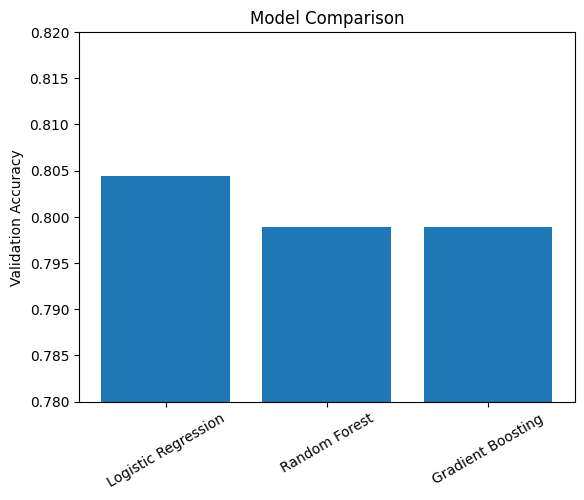

In [ ]:
# ---- Visual Comparison ----
plt.figure()
plt.bar(results.keys(), results.values())
plt.xticks(rotation=30)
plt.ylabel("Validation Accuracy")
plt.ylim(0.78,0.82)
plt.title("Model Comparison")
plt.show()

In [15]:
# --- Select Best Model ---
best_model_name = max(results, key=results.get)
print(f"Best model: {best_model_name}")

Best model: Logistic Regression
